In [1]:
import konlpy
from konlpy.tag import Hannanum, Kkma, Komoran

import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud


from sklearn.decomposition import PCA

import re
import sys
import os
import time
import random
import pandas as pd
import numpy as np

In [2]:
# 엑셀파일 하나씩 읽어오기
i6_csv = pd.read_csv('[Textmining]review_galaxy_iphone_use/GSMArena/data_from_GSMArena_i6_test.csv', encoding='utf-8')
i6S_csv = pd.read_csv('[Textmining]review_galaxy_iphone_use/GSMArena/data_from_GSMArena_i6S_test.csv')
i7_csv = pd.read_csv('[Textmining]review_galaxy_iphone_use/GSMArena/data_from_GSMArena_i7_test.csv')
S6_csv = pd.read_csv('[Textmining]review_galaxy_iphone_use/GSMArena/data_from_GSMArena_S6_test.csv')
S7_csv = pd.read_csv('[Textmining]review_galaxy_iphone_use/GSMArena/data_from_GSMArena_S7_test.csv')
S8_csv = pd.read_csv('[Textmining]review_galaxy_iphone_use/GSMArena/data_from_GSMArena_S8_test.csv')
i6_csv

,User IDs,Posted Date,Posted Location,Text
0,b'IDK',b'22 May 2017',b'wc6L',"b""Buy an iPhone SE its better thn 6But I'm On ..."
1,b'Sonu ',b'22 May 2017',b'U@at',b'i am confused iphone 6 or iphone 6s6s would ...
2,b'Sonu ',b'22 May 2017',b'U@at',b'Buy an iPhone SE its better thn 6'
3,b'IDK',b'21 May 2017',b'wc6L',"b""It's Oke For Me To Buy Iphone 6 In 2017?I Re..."
4,b'Anonymous',b'20 May 2017',b'043Z',b'i am confused iphone 6 or iphone 6s6s is muc...
...,...,...,...,...
9563,b'Exynos',b'22 May 2014',b'0FEe',b'Is this real??'
9564,b'Z',b'22 May 2014',b'K2Gx',"b""Spec sounds like below average android devic..."
9565,b'Grandmaster',b'22 May 2014',b'NwRY',b'Apple has finally succumbed to large screens...
9566,b'ABADDON',b'22 May 2014',b'UNAe',"b""this would be the fastest selling smartphone..."


'"Buy an iPhone SE its better thn 6But I\'m On Budget&Like Bigger Screen..In My Country,iphone 6 cost around rm1600 and SE Rm2300...I\'m Really On Budget Haha So What Do you Think?It\'s Will  Lag on IOS11 Next Update?Sorry For my English haha..i\'m from malaysia..."'

In [4]:
# 리뷰만 다 읽어와
# i[1:] 한 이유는 맨앞에 b를제거하기 위해서 엑셀에 보면 맨앞에 b가 붙어있음 byte데이터라서

i6_reviews = [ i[1:] for i in i6_csv['Text']]
i6s_reviews = [ i[1:] for i in i6S_csv['Text']]
i7_reviews = [ i[1:] for i in i7_csv['Text']]
S6_reviews = [ i[1:] for i in S6_csv['Text']]
S7_reviews = [ i[1:] for i in S7_csv['Text']]
S8_reviews = [ i[1:] for i in S8_csv['Text']]

In [5]:
# 전처리 특문 다 빼고 흔한단어 iphone, galaxy 같은거 뺌

i6_reviews_data = [re.sub(r"\%\$ ?\([^)]+\)-", "", x) for x in i6_reviews]
i6_reviews_data = [re.sub("\'", " ", x) for x in i6_reviews_data]
i6_reviews_data = [re.sub('\S*@\S*\s?', '', x) for x in i6_reviews_data]
i6_reviews_data = [re.sub('\s+', ' ', x) for x in i6_reviews_data]
i6_reviews_data = [re.sub('[^\w\s]','',x) for x in i6_reviews_data]
i6_reviews_data = [x.lower() for x in i6_reviews_data]
i6_reviews_data = [re.sub('(iphone|phone|apple|galaxy|android|samsung|6)','',x) for x in i6_reviews_data]

i6s_reviews_data = [re.sub(r"\%\$ ?\([^)]+\)-", "", x) for x in i6s_reviews]
i6s_reviews_data = [re.sub("\'", " ", x) for x in i6s_reviews_data]
i6s_reviews_data = [re.sub('\S*@\S*\s?', '', x) for x in i6s_reviews_data]
i6s_reviews_data = [re.sub('\s+', ' ', x) for x in i6s_reviews_data]
i6s_reviews_data = [re.sub('[^\w\s]','',x) for x in i6s_reviews_data]
i6s_reviews_data = [x.lower() for x in i6s_reviews_data]
i6s_reviews_data = [re.sub('(iphone|phone|apple|galaxy|android|samsung|6s)','',x) for x in i6s_reviews_data]

i7_reviews_data = [re.sub(r"\%\$ ?\([^)]+\)-", "", x) for x in i7_reviews]
i7_reviews_data = [re.sub("\'", " ", x) for x in i7_reviews_data]
i7_reviews_data = [re.sub('\S*@\S*\s?', '', x) for x in i7_reviews_data]
i7_reviews_data = [re.sub('\s+', ' ', x) for x in i7_reviews_data]
i7_reviews_data = [re.sub('[^\w\s]','',x) for x in i7_reviews_data]
i7_reviews_data = [x.lower() for x in i7_reviews_data]
i7_reviews_data = [re.sub('(iphone|phone|apple|galaxy|android|samsung|7)','',x) for x in i7_reviews_data]

S6_reviews_data = [re.sub(r"\%\$ ?\([^)]+\)-", "", x) for x in S6_reviews]
S6_reviews_data = [re.sub("\'", " ", x) for x in S6_reviews_data]
S6_reviews_data = [re.sub('\S*@\S*\s?', '', x) for x in S6_reviews_data]
S6_reviews_data = [re.sub('\s+', ' ', x) for x in S6_reviews_data]
S6_reviews_data = [re.sub('[^\w\s]','',x) for x in S6_reviews_data]
S6_reviews_data = [x.lower() for x in S6_reviews_data]
S6_reviews_data = [re.sub('(iphone|phone|apple|galaxy|android|samsung|6)','',x) for x in S6_reviews_data]

S7_reviews_data = [re.sub(r"\%\$ ?\([^)]+\)-", "", x) for x in S7_reviews]
S7_reviews_data = [re.sub("\'", " ", x) for x in S7_reviews_data]
S7_reviews_data = [re.sub('\S*@\S*\s?', '', x) for x in S7_reviews_data]
S7_reviews_data = [re.sub('\s+', ' ', x) for x in S7_reviews_data]
S7_reviews_data = [re.sub('[^\w\s]','',x) for x in S7_reviews_data]
S7_reviews_data = [x.lower() for x in S7_reviews_data]
S7_reviews_data = [re.sub('(iphone|phone|apple|galaxy|android|samsung|7)','',x) for x in S7_reviews_data]



S8_reviews_data = [re.sub(r"\%\$ ?\([^)]+\)-", "", x) for x in S8_reviews]
S8_reviews_data = [re.sub("\'", " ", x) for x in S8_reviews_data]
S8_reviews_data = [re.sub('\S*@\S*\s?', '', x) for x in S8_reviews_data]
S8_reviews_data = [re.sub('\s+', ' ', x) for x in S8_reviews_data]
S8_reviews_data = [re.sub('[^\w\s]','',x) for x in S8_reviews_data]
S8_reviews_data = [x.lower() for x in S8_reviews_data]
S8_reviews_data = [re.sub('(iphone|phone|apple|galaxy|android|samsung|7)','',x) for x in S8_reviews_data]

In [6]:
# tokenize 띄어쓰기로 나눈다

i6_tokens = [word_tokenize(review) for review in i6_reviews_data]
i6s_tokens = [word_tokenize(review) for review in i6s_reviews_data]
i7_tokens = [word_tokenize(review) for review in i7_reviews_data]
S6_tokens = [word_tokenize(review) for review in S6_reviews_data]
S7_tokens = [word_tokenize(review) for review in S7_reviews_data]
S8_tokens = [word_tokenize(review) for review in S8_reviews_data]

In [7]:
# lemmatizer(표제어추출)

lemmatizer = WordNetLemmatizer()
i6_lemm = [[lemmatizer.lemmatize(word) for word in doc] for doc in i6_tokens]
i6s_lemm = [[lemmatizer.lemmatize(word) for word in doc] for doc in i6s_tokens]
i7_lemm = [[lemmatizer.lemmatize(word) for word in doc] for doc in i7_tokens]
S6_lemm = [[lemmatizer.lemmatize(word) for word in doc] for doc in S6_tokens]
S7_lemm = [[lemmatizer.lemmatize(word) for word in doc] for doc in S7_tokens]
S8_lemm = [[lemmatizer.lemmatize(word) for word in doc] for doc in S8_tokens]

In [8]:
# stopword 제거 불용어 제거하기 비동사나 관사가 빠진다

stop_words = stopwords.words('english')
filtered_i6 = [[w for w in doc if not w in stop_words] for doc in i6_lemm]
filtered_i6s =[[w for w in doc if not w in stop_words] for doc in i6s_lemm]
filtered_i7 = [[w for w in doc if not w in stop_words] for doc in i7_lemm]
filtered_S6 = [[w for w in doc if not w in stop_words] for doc in S6_lemm]
filtered_S7 = [[w for w in doc if not w in stop_words] for doc in S7_lemm]
filtered_S8 = [[w for w in doc if not w in stop_words] for doc in S8_lemm]

In [9]:
filtered_i6

[['buy',
  'se',
  'better',
  'thn',
  'budgetlike',
  'bigger',
  'screenin',
  'country',
  'cost',
  'around',
  'rm100',
  'se',
  'rm2300i',
  'really',
  'budget',
  'haha',
  'thinkit',
  'lag',
  'ios11',
  'next',
  'updatesorry',
  'english',
  'hahai',
  'malaysia'],
 ['confused', 'would', 'b', 'best', 'option'],
 ['buy', 'se', 'better', 'thn'],
 ['oke',
  'buy',
  '2017i',
  'really',
  'wan',
  'na',
  'try',
  'io',
  'ecosystem',
  'bcs',
  'usermy',
  'friend',
  'suggest',
  'get',
  'se',
  'budgeti',
  'live',
  'malaysiaplease',
  'give',
  'opiniontq'],
 ['confused', 'much', 'better'],
 ['confused'],
 ['ok', 'io', '1032', '5'],
 ['friend',
  'please',
  'talk',
  'io',
  '1032',
  'battery',
  'life',
  'performance',
  'recently',
  'updated',
  '1032',
  'coming',
  '1011',
  'battery',
  'doe',
  'drain',
  'quickly',
  'compared',
  'people',
  'recently',
  'updated',
  'latest',
  'one',
  'also',
  'feel',
  'run',
  'smoothly',
  'using',
  'battery',
  'p

In [10]:
# 각 문장별로 나누어져있는 토큰을 하나의 어레이로 묶는다

i6_data = [tok for tok_list in filtered_i6 for tok in tok_list]
i6s_data =[tok for tok_list in filtered_i6s for tok in tok_list]
i7_data = [tok for tok_list in filtered_i7 for tok in tok_list]
S6_data = [tok for tok_list in filtered_S6 for tok in tok_list]
S7_data = [tok for tok_list in filtered_S7 for tok in tok_list]
S8_data = [tok for tok_list in filtered_S8 for tok in tok_list]

In [11]:
# nltk 객체 생성

i6_nltk = nltk.Text(i6_data)
i6s_nltk= nltk.Text(i6s_data)
i7_nltk = nltk.Text(i7_data)
S6_nltk = nltk.Text(S6_data)
S7_nltk = nltk.Text(S7_data)
S8_nltk = nltk.Text(S8_data)

In [12]:
# 중복을 제외한 토큰의 수

print(" i6 = [{}]\n i6s = [{}]\n i7 = [{}]\n S6 = [{}]\n S7 = [{}]\n S8 = [{}]".format(len(set(i6_nltk.tokens)),
                len(set(i6s_nltk.tokens)),
                len(set(i7_nltk.tokens)),
                len(set(S6_nltk.tokens)),
                len(set(S7_nltk.tokens)),
                len(set(S8_nltk.tokens))))

 i6 = [19190]
 i6s = [10031]
 i7 = [8648]
 S6 = [17664]
 S7 = [9596]
 S8 = [8578]


In [13]:
# 각 단어셋에 단어빈도를 추출하기 위해 FreqData 객체로 만든다. .vocab()을 쓰면 됨

i6_freq = i6_nltk.vocab()
i6s_freq = i6s_nltk.vocab()
i7_freq = i7_nltk.vocab()
S6_freq = S6_nltk.vocab()
S7_freq = S7_nltk.vocab()
S8_freq = S8_nltk.vocab()

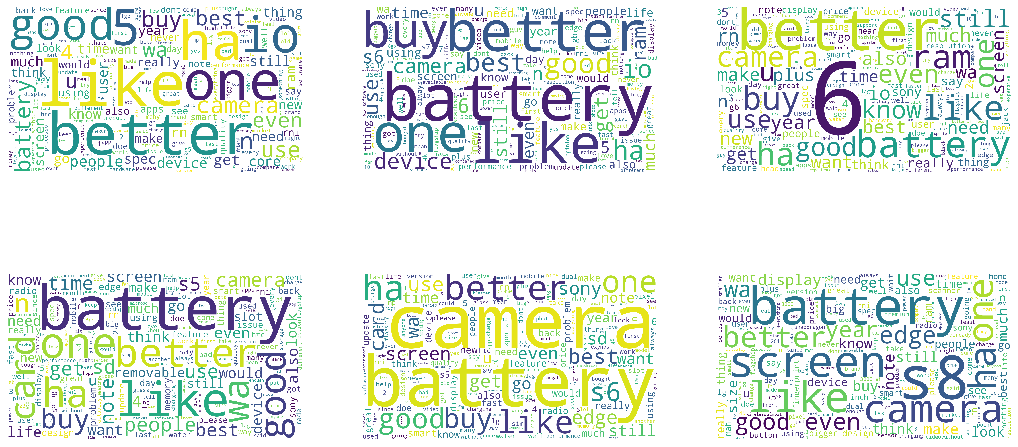

In [14]:
# 워드 클라우드를 만들어서 동시에 뛰운다 subplot(열 행 번호)

wc = WordCloud(width=1920, height=1080, background_color="white", random_state=0)
plt.figure(figsize=(18, 9))
plt.subplot(231)
plt.imshow(wc.generate_from_frequencies(i6_freq))
plt.axis("off")
plt.subplot(232)
plt.imshow(wc.generate_from_frequencies(i6s_freq))
plt.axis("off")
plt.subplot(233)
plt.imshow(wc.generate_from_frequencies(i7_freq))
plt.axis("off")
plt.subplot(234)
plt.imshow(wc.generate_from_frequencies(S6_freq))
plt.axis("off")
plt.subplot(235)
plt.imshow(wc.generate_from_frequencies(S7_freq))
plt.axis("off")
plt.subplot(236)
plt.imshow(wc.generate_from_frequencies(S8_freq))
plt.axis("off")

plt.show()

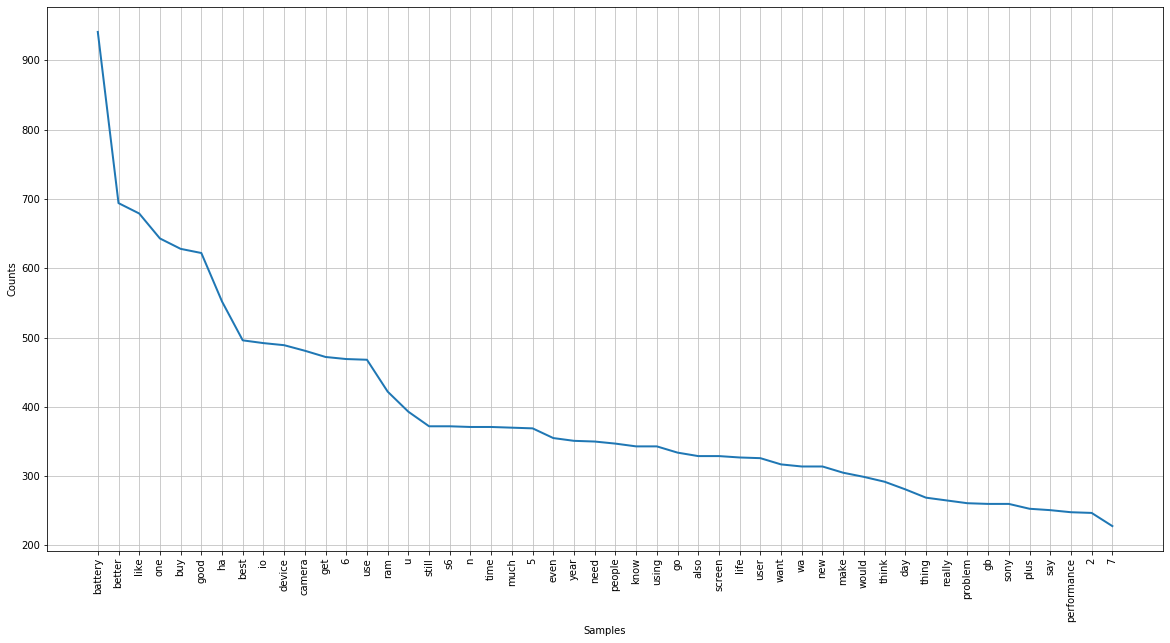

In [74]:
# nltk객체에서 바로 단어별 사용 빈도 그래프를 띄울수있다
plt.figure(figsize=(20,10))
i6s_nltk.plot(50)

In [15]:
# 하나로 합치기 전에 단어들
# filtered_i6 = [[w for w in doc if not w in stop_words] for doc in i6_lemm]
# filtered_i6s =[[w for w in doc if not w in stop_words] for doc in i6s_lemm]
# filtered_i7 = [[w for w in doc if not w in stop_words] for doc in i7_lemm]
# filtered_S6 = [[w for w in doc if not w in stop_words] for doc in S6_lemm]
# filtered_S7 = [[w for w in doc if not w in stop_words] for doc in S7_lemm]
# filtered_S8 = [[w for w in doc if not w in stop_words] for doc in S8_lemm]

# TF-IDF 활용
# TF-IDF는 문서(문장)단위로 해야해서 토큰으로 나눈것을 다시 합친다.

i6_joined = [' '.join(doc) for doc in filtered_i6]
tfidf_i6 = TfidfVectorizer().fit_transform(i6_joined)

tfidf_i6.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

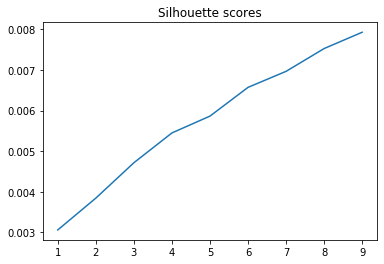

In [113]:
# k-mean 클러스터링하려는데 최적의 N을 찾아보려고 했는데 오래걸리고 잘 안나옴
# 데이터의 특징이 별로 없나보다 그냥 10으로 해봄

sil_scores = []
list_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in list_n_clusters:
    km = KMeans(n_clusters=n_clusters)
    labels_km = km.fit_predict(tfidf_i6)
    sil_scores.append(silhouette_score(tfidf_i6, labels_km))

plt.figure(3)
plt.plot(range(1, len(sil_scores) + 1), sil_scores)
plt.title('Silhouette scores')
plt.show()

In [16]:
# 일단 군집화 해보기

kmeans = KMeans(n_clusters=10).fit(tfidf_i6)

In [17]:
# 위에는 모델 만든거고 이거는 적용
labels_km = kmeans.predict(tfidf_i6)

In [18]:
# 출력해보면 이제 0~9 사이에 값을 갖는다
labels_km

array([0, 2, 9, ..., 4, 0, 0], dtype=int32)

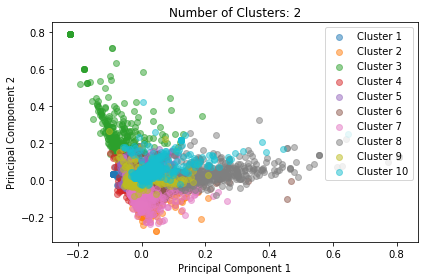

In [20]:
# 군집화된것을 시각화 해보기 위해
# 일단 PCA를 사용해서 데이터의 컬럼을 2차원으로 축소한다 원래 한 2만차원(중복되지않는 단어의 수가 여기서는 차원이다)
# 이었는데 두개로 축소함 ;;
# 2차원으로 축소한 후 labels_km에서 군집번호에 해당하는 인덱스로 실제 데이터뽑아서 점찍음

pca = PCA(n_components=2)
Z = pca.fit_transform(tfidf_i6.toarray())
plt.figure(1)
for i in range(max(labels_km) + 1):
    plt.scatter(Z[labels_km == i, 0], Z[labels_km == i, 1],
                label='Cluster {}'.format(i + 1), alpha=.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Number of Clusters: {}'.format(2))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [21]:
# 각 군집별 단어 뽑아 보려고 
# 실제 데이터에 군집번호 컬럼을 추가함

labels_i6 = []
for i in range(len(labels_km)):
    labels_i6.append([labels_km[i], i6_joined[i]])
labels_i6

[[0,
  'buy se better thn budgetlike bigger screenin country cost around rm100 se rm2300i really budget haha thinkit lag ios11 next updatesorry english hahai malaysia'],
 [2, 'confused would b best option'],
 [9, 'buy se better thn'],
 [9,
  'oke buy 2017i really wan na try io ecosystem bcs usermy friend suggest get se budgeti live malaysiaplease give opiniontq'],
 [7, 'confused much better'],
 [0, 'confused'],
 [3, 'ok io 1032 5'],
 [5,
  'friend please talk io 1032 battery life performance recently updated 1032 coming 1011 battery doe drain quickly compared people recently updated latest one also feel run smoothly using battery played mobile legend 40 battery around 3 game roughly 30 minute battery show 3'],
 [0, 'se confusingif u wan na big screen go iphn otherwise se best using'],
 [3,
  'friend please talk io 1032 battery life performance hi rahuln rni updated io 1032 new io since 3 day let tell pretty fast lag seen installed apps beloved nexus 5x see small hiccup playing game sec

In [22]:
pd_i6 = pd.DataFrame(labels_i6, columns=['Label', 'Text']);

In [35]:
# 군집번호별로 nltk객체 만들어볼려고 나누고 다시 텍스트만 토큰화함 

i6_0 = [word_tokenize(review) for review in pd_i6[pd_i6.Label == 0].Text.values]
i6_1 = [word_tokenize(review) for review in pd_i6[pd_i6.Label == 1].Text.values]
i6_2 = [word_tokenize(review) for review in pd_i6[pd_i6.Label == 2].Text.values]
i6_3 = [word_tokenize(review) for review in pd_i6[pd_i6.Label == 3].Text.values]
i6_4 = [word_tokenize(review) for review in pd_i6[pd_i6.Label == 4].Text.values]
i6_5 = [word_tokenize(review) for review in pd_i6[pd_i6.Label == 5].Text.values]
i6_6 = [word_tokenize(review) for review in pd_i6[pd_i6.Label == 6].Text.values]
i6_7 = [word_tokenize(review) for review in pd_i6[pd_i6.Label == 7].Text.values]
i6_8 = [word_tokenize(review) for review in pd_i6[pd_i6.Label == 8].Text.values]
i6_9 = [word_tokenize(review) for review in pd_i6[pd_i6.Label == 9].Text.values]

In [38]:
# 문장별 토큰으로 나누어져있던걸 하나의 문장으로 묶음 

i6_0_data = [tok for tok_list in i6_0 for tok in tok_list]
i6_1_data = [tok for tok_list in i6_1 for tok in tok_list]
i6_2_data = [tok for tok_list in i6_2 for tok in tok_list]
i6_3_data = [tok for tok_list in i6_3 for tok in tok_list]
i6_4_data = [tok for tok_list in i6_4 for tok in tok_list]
i6_5_data = [tok for tok_list in i6_5 for tok in tok_list]
i6_6_data = [tok for tok_list in i6_6 for tok in tok_list]
i6_7_data = [tok for tok_list in i6_7 for tok in tok_list]
i6_8_data = [tok for tok_list in i6_8 for tok in tok_list]
i6_9_data = [tok for tok_list in i6_9 for tok in tok_list]

In [40]:
# 다시 nltk객체 만듬

i6_0_nltk = nltk.Text(i6_0_data)
i6_1_nltk = nltk.Text(i6_1_data)
i6_2_nltk = nltk.Text(i6_2_data)
i6_3_nltk = nltk.Text(i6_3_data)
i6_4_nltk = nltk.Text(i6_4_data)
i6_5_nltk = nltk.Text(i6_5_data)
i6_6_nltk = nltk.Text(i6_6_data)
i6_7_nltk = nltk.Text(i6_7_data)
i6_8_nltk = nltk.Text(i6_8_data)
i6_9_nltk = nltk.Text(i6_9_data)

In [41]:
# FreqData 셋 만듬

i6_0_freq = i6_0_nltk.vocab()
i6_1_freq = i6_1_nltk.vocab()
i6_2_freq = i6_2_nltk.vocab()
i6_3_freq = i6_3_nltk.vocab()
i6_4_freq = i6_4_nltk.vocab()
i6_5_freq = i6_5_nltk.vocab()
i6_6_freq = i6_6_nltk.vocab()
i6_7_freq = i6_7_nltk.vocab()
i6_8_freq = i6_8_nltk.vocab()
i6_9_freq = i6_9_nltk.vocab()

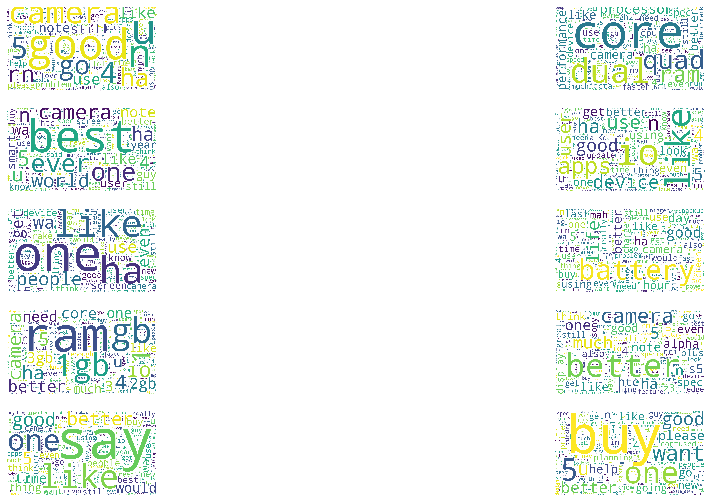

In [44]:
# 워드 클라우드 그려봄

wc = WordCloud(width=1920, height=1080, background_color="white", random_state=0)
plt.figure(figsize=(18, 9))
plt.subplot(521)
plt.imshow(wc.generate_from_frequencies(i6_0_freq))
plt.axis("off")
plt.subplot(522)
plt.imshow(wc.generate_from_frequencies(i6_1_freq))
plt.axis("off")
plt.subplot(523)
plt.imshow(wc.generate_from_frequencies(i6_2_freq))
plt.axis("off")
plt.subplot(524)
plt.imshow(wc.generate_from_frequencies(i6_3_freq))
plt.axis("off")
plt.subplot(525)
plt.imshow(wc.generate_from_frequencies(i6_4_freq))
plt.axis("off")
plt.subplot(526)
plt.imshow(wc.generate_from_frequencies(i6_5_freq))
plt.axis("off")
plt.subplot(527)
plt.imshow(wc.generate_from_frequencies(i6_6_freq))
plt.axis("off")
plt.subplot(528)
plt.imshow(wc.generate_from_frequencies(i6_7_freq))
plt.axis("off")
plt.subplot(529)
plt.imshow(wc.generate_from_frequencies(i6_8_freq))
plt.axis("off")
plt.subplot(5,2,10)
plt.imshow(wc.generate_from_frequencies(i6_9_freq))
plt.axis("off")

plt.show()

In [47]:
# 시각화보다는 표로 보이는게 편할것 같아서 표로 만듬

top10 = [i6_0_freq.most_common(10),
 i6_1_freq.most_common(10),
 i6_2_freq.most_common(10),
 i6_3_freq.most_common(10),
 i6_4_freq.most_common(10),
 i6_5_freq.most_common(10),
 i6_6_freq.most_common(10),
 i6_7_freq.most_common(10),
 i6_8_freq.most_common(10),
 i6_9_freq.most_common(10),
 ]

top10_pd = pd.DataFrame(top10, columns=[1,2,3,4,5,6,7,8,9,10])

In [48]:
# 출력해봄
top10_pd

,1,2,3,4,5,6,7,8,9,10
0,"(good, 310)","(u, 301)","(n, 273)","(camera, 247)","(5, 229)","(4, 215)","(go, 214)","(ha, 207)","(rn, 182)","(like, 161)"
1,"(core, 583)","(dual, 254)","(quad, 148)","(ram, 108)","(processor, 90)","(camera, 71)","(performance, 70)","(like, 69)","(better, 67)","(ha, 63)"
2,"(best, 441)","(ever, 56)","(one, 56)","(5, 41)","(camera, 36)","(u, 34)","(world, 32)","(n, 32)","(ha, 30)","(4, 28)"
3,"(io, 812)","(like, 712)","(apps, 222)","(n, 170)","(ha, 162)","(use, 154)","(device, 147)","(user, 147)","(good, 133)","(5, 127)"
4,"(one, 866)","(like, 742)","(ha, 720)","(people, 691)","(wa, 678)","(use, 572)","(even, 563)","(get, 532)","(screen, 531)","(know, 512)"
5,"(battery, 679)","(life, 193)","(good, 126)","(better, 87)","(day, 86)","(5, 80)","(ha, 78)","(camera, 75)","(hour, 73)","(use, 68)"
6,"(ram, 385)","(gb, 176)","(1gb, 135)","(1, 89)","(io, 56)","(4, 49)","(camera, 47)","(ha, 45)","(5, 44)","(better, 44)"
7,"(better, 792)","(camera, 210)","(much, 138)","(5, 138)","(ha, 102)","(one, 101)","(n, 96)","(s5, 77)","(note, 72)","(alpha, 67)"
8,"(say, 329)","(like, 71)","(one, 57)","(better, 56)","(good, 54)","(5, 48)","(would, 46)","(time, 44)","(thing, 43)","(wa, 43)"
9,"(buy, 583)","(5, 95)","(one, 94)","(want, 91)","(u, 61)","(good, 59)","(better, 58)","(please, 58)","(help, 54)","(go, 46)"
